# Project: Uber vs Lyft

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Question(s) for Analysis
Is there a statistically significant difference in average daily earnings for drivers working with Uber versus Lyft in New York City during 2021?
  
As the ride-share industry continues to grow, this data analysis stands as a valuable resource for both newcomers and drivers committed to a single company. By offering insights into the comparative profitability between companies, it equips drivers with the knowledge to optimize their earning potential. This analysis empowers drivers to discern whether sticking with a single service or diversifying across platforms is the key to maximizing their efficiency and earnings.

In [1]:
# Import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

<a id='wrangling'></a>
### Data Wrangling
In this section, I will load in the data, assess its properties, and prepare to clean for analysis.

In [39]:
# Load monthly trip DataFrames

jan = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-01.parquet')
feb = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-02.parquet')
mar = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-03.parquet')
apr = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-04.parquet')
may = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-05.parquet')
jun = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-06.parquet')
jul = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-07.parquet')
aug = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-08.parquet')
sep = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-09.parquet')
oct = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-10.parquet')
nov = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-11.parquet')
dec = pd.read_parquet('/Users/Huffnagle/Documents/Capstone/D195-Capstone/fhvhv_tripdata_2021-12.parquet')

# Display the jan DataFrame
jan.head()  

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02682,B02682,2021-01-01 00:28:09,2021-01-01 00:31:42,2021-01-01 00:33:44,2021-01-01 00:49:07,230,166,5.26,...,1.98,2.75,NaN,0.00,14.99,N,N,,N,N
1,HV0003,B02682,B02682,2021-01-01 00:45:56,2021-01-01 00:55:19,2021-01-01 00:55:19,2021-01-01 01:18:21,152,167,3.65,...,1.63,0.00,NaN,0.00,17.06,N,N,,N,N
2,HV0003,B02764,B02764,2021-01-01 00:21:15,2021-01-01 00:22:41,2021-01-01 00:23:56,2021-01-01 00:38:05,233,142,3.51,...,1.25,2.75,NaN,0.94,12.98,N,N,,N,N
3,HV0003,B02764,B02764,2021-01-01 00:39:12,2021-01-01 00:42:37,2021-01-01 00:42:51,2021-01-01 00:45:50,142,143,0.74,...,0.70,2.75,NaN,0.00,7.41,N,N,,N,N
4,HV0003,B02764,B02764,2021-01-01 00:46:11,2021-01-01 00:47:17,2021-01-01 00:48:14,2021-01-01 01:08:42,143,78,9.20,...,2.41,2.75,NaN,0.00,22.44,N,N,,N,N


In [5]:
print(jan.shape)
print(feb.shape)
print(mar.shape)
print(apr.shape)
print(may.shape)
print(jun.shape)
print(jul.shape)
print(aug.shape)
print(sep.shape)
print(oct.shape)
print(nov.shape)
print(dec.shape)

(11908468, 24)
(11613942, 24)
(14227393, 24)
(14111371, 24)
(14719171, 24)
(14961892, 24)
(15027174, 24)
(14499696, 24)
(14886055, 24)
(16545356, 24)
(16041639, 24)
(16054495, 24)


#### Displaying information about each column
This shows the header for each column along with the number of values and data types.

In [6]:
jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11908468 entries, 0 to 11908467
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [7]:
feb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11613942 entries, 0 to 11613941
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [8]:
mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14227393 entries, 0 to 14227392
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [9]:
apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14111371 entries, 0 to 14111370
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [10]:
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14719171 entries, 0 to 14719170
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [11]:
jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14961892 entries, 0 to 14961891
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [12]:
jul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15027174 entries, 0 to 15027173
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [13]:
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14499696 entries, 0 to 14499695
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [14]:
sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14886055 entries, 0 to 14886054
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [15]:
oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16545356 entries, 0 to 16545355
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [16]:
nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16041639 entries, 0 to 16041638
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [17]:
dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16054495 entries, 0 to 16054494
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

#### Check for duplicated rows
This displays a count of the duplicate rows in the dataset

In [18]:
#count the number of duplicated values in each column
print(jan.duplicated().sum())
print(feb.duplicated().sum())
print(mar.duplicated().sum())
print(apr.duplicated().sum())
print(may.duplicated().sum())
print(jun.duplicated().sum())
print(jul.duplicated().sum())
print(aug.duplicated().sum())
print(sep.duplicated().sum())
print(oct.duplicated().sum())
print(nov.duplicated().sum())
print(dec.duplicated().sum())    

26
0
0
25
510
0
0
0
0
0
0
0


In [3]:
# Find rows where all fields (all columns) are duplicated
jan_duplicated_rows = jan[jan.duplicated(keep=False, subset=apr.columns)]

# Displaying duplicated rows
print(jan_duplicated_rows)

        hvfhs_license_num dispatching_base_num originating_base_num  \
750632             HV0003               B02875               B02875   
750633             HV0003               B02875               B02875   
750634             HV0003               B02875               B02875   
750635             HV0003               B02875               B02875   
750636             HV0003               B02875               B02875   
750637             HV0003               B02875               B02875   
751647             HV0003               B02887               B02887   
751648             HV0003               B02887               B02887   
761996             HV0003               B02887               B02887   
761997             HV0003               B02887               B02887   
761998             HV0003               B02887               B02887   
761999             HV0003               B02887               B02887   
780299             HV0003               B02887               B02887   
780300

In [40]:
jan = jan.drop_duplicates()
jan.shape

(11908442, 24)

In [5]:
# Find rows where all fields (all columns) are duplicated
apr_duplicated_rows = apr[apr.duplicated(keep=False, subset=apr.columns)]

# Displaying duplicated rows
print(apr_duplicated_rows)

        hvfhs_license_num dispatching_base_num originating_base_num  \
4825565            HV0003               B02866               B02866   
4825566            HV0003               B02866               B02866   
4825567            HV0003               B02866               B02866   
4825568            HV0003               B02866               B02866   
4862660            HV0003               B02866               B02866   
4862661            HV0003               B02866               B02866   
4862662            HV0003               B02866               B02866   
4862663            HV0003               B02866               B02866   
4880552            HV0003               B02866               B02866   
4880553            HV0003               B02866               B02866   
5116025            HV0003               B02866               B02866   
5116026            HV0003               B02866               B02866   
5143268            HV0003               B02866               B02866   
514327

In [41]:
apr = apr.drop_duplicates()
apr.shape

(14111346, 24)

In [21]:
# Find rows where all fields (all columns) are duplicated
may_duplicated_rows = may[may.duplicated(keep=False, subset=apr.columns)]

# Displaying duplicated rows
print(may_duplicated_rows)

         hvfhs_license_num dispatching_base_num originating_base_num  \
522430              HV0005               B02510                 None   
522431              HV0005               B02510                 None   
554023              HV0005               B02510                 None   
554024              HV0005               B02510                 None   
554025              HV0005               B02510                 None   
...                    ...                  ...                  ...   
13521417            HV0005               B02510                 None   
13521418            HV0005               B02510                 None   
13521419            HV0005               B02510                 None   
13576625            HV0005               B02510                 None   
13576626            HV0005               B02510                 None   

            request_datetime on_scene_datetime     pickup_datetime  \
522430   2021-05-01 23:47:32               NaT 2021-05-01 23:55:4

In [42]:
may = may.drop_duplicates()

may.shape

(14718661, 24)

#### Count the number of unique values in each column

In [23]:
#count number of unique values in each column
jan.nunique()

hvfhs_license_num             3
dispatching_base_num         32
originating_base_num         39
request_datetime        2489016
on_scene_datetime       2372031
pickup_datetime         2491317
dropoff_datetime        2490166
PULocationID                262
DOLocationID                262
trip_miles                44475
trip_time                  8739
base_passenger_fare       21712
tolls                      4048
bcf                        1380
sales_tax                  2603
congestion_surcharge          3
airport_fee                   1
tips                       3918
driver_pay                16518
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [24]:
jan['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [25]:
feb.nunique()

hvfhs_license_num             3
dispatching_base_num         32
originating_base_num         38
request_datetime        2251917
on_scene_datetime       2151725
pickup_datetime         2254081
dropoff_datetime        2252843
PULocationID                261
DOLocationID                261
trip_miles                43968
trip_time                  9005
base_passenger_fare       22538
tolls                      4399
bcf                        1394
sales_tax                  2699
congestion_surcharge          4
airport_fee                   1
tips                       4066
driver_pay                16802
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [26]:
feb['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [27]:
mar.nunique()

hvfhs_license_num             3
dispatching_base_num         32
originating_base_num         38
request_datetime        2523679
on_scene_datetime       2425569
pickup_datetime         2525960
dropoff_datetime        2524887
PULocationID                262
DOLocationID                263
trip_miles                47993
trip_time                  9558
base_passenger_fare       23900
tolls                      4301
bcf                        1454
sales_tax                  2793
congestion_surcharge          4
airport_fee                   1
tips                       4303
driver_pay                18045
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [28]:
mar['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [29]:
apr.nunique()

hvfhs_license_num             3
dispatching_base_num         32
originating_base_num         37
request_datetime        2453647
on_scene_datetime       2364289
pickup_datetime         2456086
dropoff_datetime        2455628
PULocationID                262
DOLocationID                261
trip_miles                48021
trip_time                  9859
base_passenger_fare       25291
tolls                      4381
bcf                        1533
sales_tax                  2967
congestion_surcharge          6
airport_fee                  10
tips                       4589
driver_pay                18819
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [30]:
apr['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [31]:
may.nunique()

hvfhs_license_num             3
dispatching_base_num         32
originating_base_num         38
request_datetime        2554665
on_scene_datetime       2473666
pickup_datetime         2558060
dropoff_datetime        2557102
PULocationID                261
DOLocationID                262
trip_miles                50183
trip_time                 10656
base_passenger_fare       27226
tolls                      4140
bcf                        1581
sales_tax                  3263
congestion_surcharge          5
airport_fee                   7
tips                       5046
driver_pay                20477
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [32]:
may['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [33]:
jun.nunique()

hvfhs_license_num             3
dispatching_base_num         32
originating_base_num         39
request_datetime        2500477
on_scene_datetime       2427233
pickup_datetime         2503634
dropoff_datetime        2503182
PULocationID                263
DOLocationID                263
trip_miles                51666
trip_time                 11539
base_passenger_fare       29015
tolls                      4285
bcf                        1736
sales_tax                  3576
congestion_surcharge          5
airport_fee                   8
tips                       5569
driver_pay                23162
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [34]:
jun['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [35]:
jul.nunique()

hvfhs_license_num             3
dispatching_base_num         32
originating_base_num         38
request_datetime        2584954
on_scene_datetime       2505945
pickup_datetime         2590139
dropoff_datetime        2590242
PULocationID                260
DOLocationID                262
trip_miles                51199
trip_time                 11234
base_passenger_fare       29234
tolls                      4149
bcf                        1722
sales_tax                  3623
congestion_surcharge          5
airport_fee                  10
tips                       5703
driver_pay                21784
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [36]:
jul['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [37]:
aug.nunique()

hvfhs_license_num             3
dispatching_base_num         32
originating_base_num         36
request_datetime        2575322
on_scene_datetime       2480961
pickup_datetime         2579303
dropoff_datetime        2579626
PULocationID                261
DOLocationID                263
trip_miles                50980
trip_time                 10935
base_passenger_fare       29106
tolls                      3931
bcf                        1741
sales_tax                  3540
congestion_surcharge          4
airport_fee                  12
tips                       5827
driver_pay                21616
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [38]:
aug['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [39]:
sep.nunique()

hvfhs_license_num             3
dispatching_base_num         33
originating_base_num         36
request_datetime        2495749
on_scene_datetime       2414577
pickup_datetime         2500725
dropoff_datetime        2499915
PULocationID                263
DOLocationID                261
trip_miles                49789
trip_time                 11390
base_passenger_fare       29516
tolls                      4246
bcf                        1722
sales_tax                  3509
congestion_surcharge          6
airport_fee                  12
tips                       6065
driver_pay                21243
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [40]:
sep['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [41]:
oct.nunique()

hvfhs_license_num             3
dispatching_base_num         32
originating_base_num         38
request_datetime        2584820
on_scene_datetime       2512631
pickup_datetime         2589021
dropoff_datetime        2588437
PULocationID                262
DOLocationID                263
trip_miles                50191
trip_time                 10996
base_passenger_fare       28045
tolls                      4264
bcf                        1683
sales_tax                  3260
congestion_surcharge          6
airport_fee                   9
tips                       5816
driver_pay                20349
shared_request_flag           2
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [42]:
oct['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005', 'HV0004'], dtype=object)

In [43]:
nov.nunique()

hvfhs_license_num             2
dispatching_base_num         29
originating_base_num         35
request_datetime        2505752
on_scene_datetime       2437444
pickup_datetime         2509692
dropoff_datetime        2509528
PULocationID                261
DOLocationID                261
trip_miles                50187
trip_time                 11088
base_passenger_fare       28289
tolls                      4217
bcf                        1661
sales_tax                  3220
congestion_surcharge          5
airport_fee                  10
tips                       5575
driver_pay                20482
shared_request_flag           1
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [44]:
nov['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005'], dtype=object)

In [45]:
dec.nunique()

hvfhs_license_num             2
dispatching_base_num         27
originating_base_num         33
request_datetime        2577609
on_scene_datetime       2498404
pickup_datetime         2582368
dropoff_datetime        2581622
PULocationID                262
DOLocationID                263
trip_miles                49692
trip_time                 10116
base_passenger_fare       28279
tolls                      4445
bcf                        1587
sales_tax                  3130
congestion_surcharge          4
airport_fee                   7
tips                       5748
driver_pay                20037
shared_request_flag           1
shared_match_flag             2
access_a_ride_flag            2
wav_request_flag              2
wav_match_flag                2
dtype: int64

In [46]:
dec['hvfhs_license_num'].unique()

array(['HV0003', 'HV0005'], dtype=object)

### Data Cleaning

In this section, I will clean the data by addressing the following issues found during wrangling:
- Drop rows that do not contain Lyft or Uber ride data
- Rename hvfhs_license_num column header and values
- Combine DataFrames
- Drop columns that are not needed to answer the analysis questions
- Insert Date column
- Insert Total Pay column to combine driver pay & tips
- Insert Pay Rate column
- Export cleaned data to .csv file

#### Remove rows that do not contain Uber or Lyft ride data

In [47]:
# List of DataFrames
months = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

# Loop through the list and filter out rows with 'HV0004' in 'hvfhs_license_num' column
for i in range(len(months)):
    months[i] = months[i][months[i]['hvfhs_license_num'] != 'HV0004'].copy()

In [48]:
# Loop through the list and check unique values in 'hvfhs_license_num' column for each DataFrame
for df in months:
    unique_values = df['hvfhs_license_num'].unique()
    print(unique_values)

['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']
['HV0003' 'HV0005']


#### Rename hvfhs_license_num column header & values

In [49]:
# Loop through the list and perform replacements and column renaming
for i, df in enumerate(months):
    months[i] = df.copy()  # Make a copy of the DataFrame to avoid SettingWithCopyWarning
    months[i]['hvfhs_license_num'].replace({'HV0003': 'Uber', 'HV0005': 'Lyft'}, inplace=True)
    months[i].rename(columns={'hvfhs_license_num': 'rideshare'}, inplace=True)

In [50]:
for i, df in enumerate(months, start=1):
    print(f"DataFrame {i} - Rideshare column head:")
    print(df['rideshare'].head())
    print("---------------------")

DataFrame 1 - Rideshare column head:
0    Uber
1    Uber
2    Uber
3    Uber
4    Uber
Name: rideshare, dtype: object
---------------------
DataFrame 2 - Rideshare column head:
0    Uber
1    Uber
2    Lyft
3    Lyft
4    Uber
Name: rideshare, dtype: object
---------------------
DataFrame 3 - Rideshare column head:
0    Uber
1    Uber
2    Uber
3    Uber
4    Uber
Name: rideshare, dtype: object
---------------------
DataFrame 4 - Rideshare column head:
0    Uber
1    Uber
2    Uber
3    Uber
4    Uber
Name: rideshare, dtype: object
---------------------
DataFrame 5 - Rideshare column head:
0    Uber
1    Uber
2    Uber
3    Uber
4    Uber
Name: rideshare, dtype: object
---------------------
DataFrame 6 - Rideshare column head:
0    Uber
1    Uber
2    Uber
3    Uber
4    Lyft
Name: rideshare, dtype: object
---------------------
DataFrame 7 - Rideshare column head:
0    Uber
1    Uber
2    Uber
3    Uber
4    Uber
Name: rideshare, dtype: object
---------------------
DataFrame 8 - Ridesh

#### Drop columns that are not needed to answer the analysis questions

In [51]:
# List of columns to filter out
columns_to_remove = ['dispatching_base_num', 'originating_base_num', 'request_datetime', 'on_scene_datetime', 'PULocationID', 'DOLocationID', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag']

# Remove specified columns from each DataFrame using list comprehension
months = [df.drop(columns=columns_to_remove).copy() for df in months]

In [54]:
for df in months:
    print(df.head(2))

  rideshare     pickup_datetime    dropoff_datetime  trip_miles  trip_time  \
0      Uber 2021-01-01 00:33:44 2021-01-01 00:49:07        5.26        923   
1      Uber 2021-01-01 00:55:19 2021-01-01 01:18:21        3.65       1382   

   tips  driver_pay  
0   0.0       14.99  
1   0.0       17.06  
  rideshare     pickup_datetime    dropoff_datetime  trip_miles  trip_time  \
0      Uber 2021-02-01 00:10:40 2021-02-01 00:21:09        2.06        629   
1      Uber 2021-02-01 00:27:23 2021-02-01 00:44:01        3.15        998   

   tips  driver_pay  
0   0.0        9.79  
1   0.0       24.01  
  rideshare     pickup_datetime    dropoff_datetime  trip_miles  trip_time  \
0      Uber 2021-03-01 00:07:07 2021-03-01 00:13:56        1.35        409   
1      Uber 2021-03-01 00:17:00 2021-03-01 00:38:08        7.03       1268   

   tips  driver_pay  
0   0.0        5.39  
1   0.0       18.38  
  rideshare     pickup_datetime    dropoff_datetime  trip_miles  trip_time  \
0      Uber 2021-04

#### Insert Date Row

In [55]:
# Loop through the dictionary and extract the date from 'pickup_datetime'
for i in range(len(months)):
    months[i] = months[i].copy()
    months[i]['date'] = months[i]['pickup_datetime'].dt.date

In [58]:
# Loop through the list and extract the date from 'pickup_datetime' column
for i, df in enumerate(months, start=1):
    df['date'] = df['pickup_datetime'].dt.date
    print(f"DataFrame {i} - Extracted 'date' column head:")
    print(df['date'].head(2))
    print("---------------------")

DataFrame 1 - Extracted 'date' column head:
0    2021-01-01
1    2021-01-01
Name: date, dtype: object
---------------------
DataFrame 2 - Extracted 'date' column head:
0    2021-02-01
1    2021-02-01
Name: date, dtype: object
---------------------
DataFrame 3 - Extracted 'date' column head:
0    2021-03-01
1    2021-03-01
Name: date, dtype: object
---------------------
DataFrame 4 - Extracted 'date' column head:
0    2021-04-01
1    2021-04-01
Name: date, dtype: object
---------------------
DataFrame 5 - Extracted 'date' column head:
0    2021-05-01
1    2021-05-01
Name: date, dtype: object
---------------------
DataFrame 6 - Extracted 'date' column head:
0    2021-06-01
1    2021-06-01
Name: date, dtype: object
---------------------
DataFrame 7 - Extracted 'date' column head:
0    2021-07-01
1    2021-07-01
Name: date, dtype: object
---------------------
DataFrame 8 - Extracted 'date' column head:
0    2021-08-01
1    2021-08-01
Name: date, dtype: object
---------------------
DataFram

#### Add Total Pay and Pay Rate Columns

In [59]:
# Loop through the list and add a new 'Total Pay' column
for i in range(len(months)):
    months[i] = months[i].copy()
    months[i]['total_pay'] = months[i]['tips'] + months[i]['driver_pay']

In [60]:
# Loop through the list and display the head of the 'Total Pay' column for each DataFrame
for i, df in enumerate(months, start=1):
    df['total_pay'] = df['tips'] + df['driver_pay']
    print(f"DataFrame {i} - 'Total Pay' column head:")
    print(df['total_pay'].head(2))
    print("---------------------")

DataFrame 1 - 'Total Pay' column head:
0    14.99
1    17.06
Name: total_pay, dtype: float64
---------------------
DataFrame 2 - 'Total Pay' column head:
0     9.79
1    24.01
Name: total_pay, dtype: float64
---------------------
DataFrame 3 - 'Total Pay' column head:
0     5.39
1    18.38
Name: total_pay, dtype: float64
---------------------
DataFrame 4 - 'Total Pay' column head:
0    11.98
1    11.86
Name: total_pay, dtype: float64
---------------------
DataFrame 5 - 'Total Pay' column head:
0    10.66
1    36.43
Name: total_pay, dtype: float64
---------------------
DataFrame 6 - 'Total Pay' column head:
0    7.03
1    9.03
Name: total_pay, dtype: float64
---------------------
DataFrame 7 - 'Total Pay' column head:
0     7.17
1    12.16
Name: total_pay, dtype: float64
---------------------
DataFrame 8 - 'Total Pay' column head:
0    26.28
1    26.88
Name: total_pay, dtype: float64
---------------------
DataFrame 9 - 'Total Pay' column head:
0    51.52
1     6.01
Name: total_pay, dtyp

In [61]:
# Loop through the list and calculate Pay Rate per hour
for df in months:
    df = df.copy()
    df['pay_rate'] = df['total_pay'] / (df['trip_time'] / 3600)

In [62]:
# Loop through the list and display the head of the 'Pay Rate' column for each DataFrame
for i, df in enumerate(months, start=1):
    df['pay_rate'] = df['total_pay'] / (df['trip_time'] / 3600)
    print(f"DataFrame {i} - 'Pay Rate' column head:")
    print(df['pay_rate'].head(2))
    print("---------------------")

DataFrame 1 - 'Pay Rate' column head:
0    58.465872
1    44.439942
Name: pay_rate, dtype: float64
---------------------
DataFrame 2 - 'Pay Rate' column head:
0    56.031797
1    86.609218
Name: pay_rate, dtype: float64
---------------------
DataFrame 3 - 'Pay Rate' column head:
0    47.442543
1    52.182965
Name: pay_rate, dtype: float64
---------------------
DataFrame 4 - 'Pay Rate' column head:
0    46.929271
1    75.169014
Name: pay_rate, dtype: float64
---------------------
DataFrame 5 - 'Pay Rate' column head:
0     87.616438
1    160.523868
Name: pay_rate, dtype: float64
---------------------
DataFrame 6 - 'Pay Rate' column head:
0     82.977049
1    109.087248
Name: pay_rate, dtype: float64
---------------------
DataFrame 7 - 'Pay Rate' column head:
0     58.004494
1    113.409326
Name: pay_rate, dtype: float64
---------------------
DataFrame 8 - 'Pay Rate' column head:
0    73.000000
1    91.463138
Name: pay_rate, dtype: float64
---------------------
DataFrame 9 - 'Pay Rate' c

#### Remove Outliers

In [63]:
# Loop through the list and drop rows with invalid and outlier data
for i in range(len(months)):
    months[i] = months[i].loc[(months[i]['trip_miles'] > 0) & (months[i]['trip_time'] > 0) & (months[i]['driver_pay'] > 0) & (months[i]['total_pay'] > 1) & (months[i]['total_pay'] < 500)]

#### Combine DataFrames

In [69]:
combined_df = pd.concat(months, ignore_index=True)

In [70]:
# Verify the combined dataframe
combined_df.head()

,rideshare,pickup_datetime,dropoff_datetime,trip_miles,trip_time,tips,driver_pay,date,total_pay,pay_rate
0,Uber,2021-01-01 00:33:44,2021-01-01 00:49:07,5.26,923,0.00,14.99,2021-01-01,14.99,58.465872
1,Uber,2021-01-01 00:55:19,2021-01-01 01:18:21,3.65,1382,0.00,17.06,2021-01-01,17.06,44.439942
2,Uber,2021-01-01 00:23:56,2021-01-01 00:38:05,3.51,849,0.94,12.98,2021-01-01,13.92,59.024735
3,Uber,2021-01-01 00:42:51,2021-01-01 00:45:50,0.74,179,0.00,7.41,2021-01-01,7.41,149.027933
4,Uber,2021-01-01 00:48:14,2021-01-01 01:08:42,9.20,1228,0.00,22.44,2021-01-01,22.44,65.785016


In [71]:
combined_df.shape

(172950488, 10)

#### Export cleaned DataFrame to .parquet file

In [72]:
# Exporting DataFrame to a Parquet file named 'combined_data.parquet'
combined_df.to_parquet('combined_data.parquet', index=False)

<a id='eda'></a>
### Analyzing and Visualizing Data

In [2]:
combined_df = pd.read_parquet('combined_data.parquet')

In [11]:
# Separate data for Uber and Lyft with total_pay and pay_rate columns
uber_data = combined_df[combined_df['rideshare'] == 'Uber']['total_pay']
lyft_data = combined_df[combined_df['rideshare'] == 'Lyft']['total_pay']

In [12]:
# Perform independent samples t-test
t_statistic, p_value = ttest_ind(uber_data, lyft_data, equal_var=False)

# Display the results
print("Independent Samples T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check for significance at 0.05
if p_value < 0.05:
    print("The difference in average daily earnings between Uber and Lyft drivers is statistically significant.")
else:
    print("There is no significant difference in average daily earnings between Uber and Lyft drivers.")

Independent Samples T-Test Results:
T-Statistic: 602.2085599912111
P-Value: 0.0
The difference in average daily earnings between Uber and Lyft drivers is statistically significant.


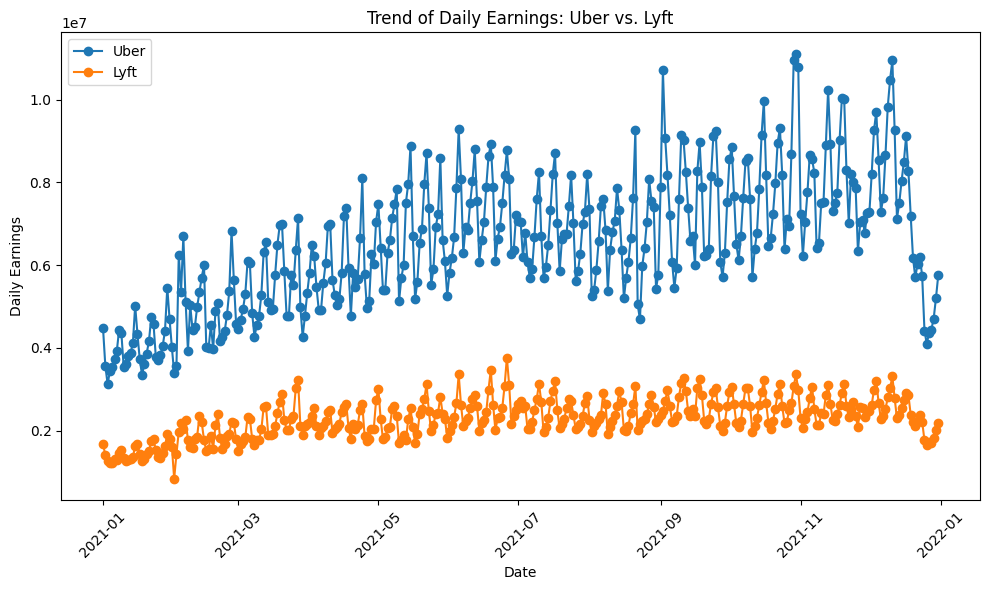

In [19]:
# Pivot the data for line plot
pivot_df = daily_earnings.pivot(index='date', columns='rideshare', values='total_pay').reset_index()

# Plotting the trend of average daily earnings over time
plt.figure(figsize=(10, 6))
plt.plot(pivot_df['date'], pivot_df['Uber'], label='Uber', marker='o')
plt.plot(pivot_df['date'], pivot_df['Lyft'], label='Lyft', marker='o')
plt.xlabel('Date')
plt.ylabel('Daily Earnings')
plt.title('Trend of Daily Earnings: Uber vs. Lyft')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Separate data for Uber and Lyft using pay_rate
uber_pay_rate = combined_df[combined_df['rideshare'] == 'Uber']['pay_rate']
lyft_pay_rate = combined_df[combined_df['rideshare'] == 'Lyft']['pay_rate']

In [14]:
# Perform independent samples t-test
t_statistic, p_value = ttest_ind(uber_pay_rate, lyft_pay_rate, equal_var=False)

# Display the results
print("Independent Samples T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check for significance at 0.05
if p_value < 0.05:
    print("The difference in average pay rates between Uber and Lyft drivers is statistically significant.")
else:
    print("There is no significant difference in average pay rates between Uber and Lyft drivers.")

Independent Samples T-Test Results:
T-Statistic: 309.0512072778535
P-Value: 0.0
The difference in average pay rates between Uber and Lyft drivers is statistically significant.


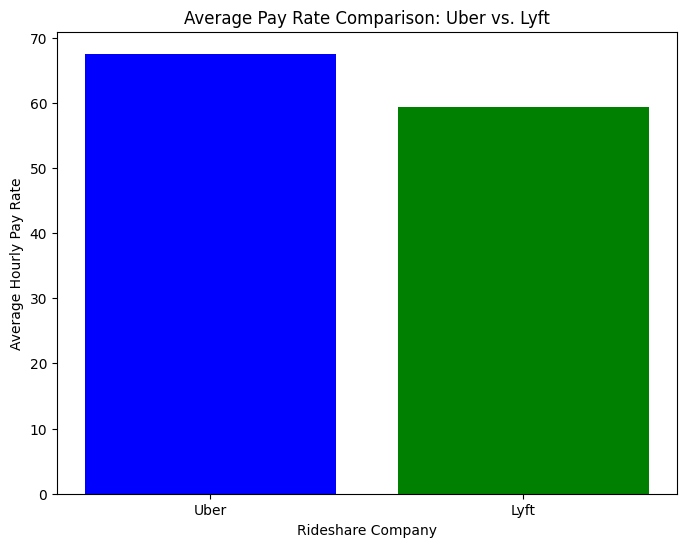

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(['Uber', 'Lyft'], [uber_pay_rate.mean(), lyft_pay_rate.mean()], color=['blue', 'green'])
plt.xlabel('Rideshare Company')
plt.ylabel('Average Hourly Pay Rate')
plt.title('Average Pay Rate Comparison: Uber vs. Lyft')
plt.show()

<a id='conclusions'></a>
### Conclusions

The project focused on analyzing the average daily earnings of Uber and Lyft drivers using an independent samples t-test. Through this statistical comparison, a significant difference in earnings between the two ride-sharing platforms was identified, indicating that the mean daily earnings for drivers significantly vary between Uber and Lyft. This aligns with the project's goal of discerning whether a substantial difference exists in the average daily earnings between these entities.

In the conducted analysis, an independent samples t-test was performed to ascertain any disparity in the average pay rates between Uber and Lyft drivers. The null hypothesis posited no significant difference in the average pay rates between the two groups. Utilizing the t-test method, a t-statistic of 309.0512072778535 was obtained, along with a derived p-value of 0.0. This statistical test was executed with an alpha value set at 0.05 to gauge statistical significance.

The obtained results indicated that the calculated p-value of 0.0 fell well below the predetermined significance level of 0.05. Consequently, there was evidence to reject the null hypothesis. Thus, it was concluded that a statistically significant difference exists in the average pay rates between Uber and Lyft drivers. 

The statistically significant divergence in earnings highlights the practical significance of the findings, suggesting tangible disparities in financial performance within the rideshare industry. However, it's essential to note that while there's a significant difference in earnings, practical implications may differ based on individual drivers' experiences due to various factors like location, demand, and driving hours.

The results from the independent samples t-test revealed a statistically significant difference in the average pay rates between Uber and Lyft drivers. This finding holds practical significance, indicating a substantial disparity in earnings between these two prominent ride-sharing companies. For instance, suppose Uber drivers consistently earn significantly higher pay rates compared to their counterparts at Lyft. In that case, this difference becomes practically meaningful in real-life scenarios, potentially influencing drivers' choices of the platform they wish to work for based on their income expectations.

These results provide valuable insights for stakeholders, enabling them to make informed decisions within the ridesharing domain. For instance, ride-sharing companies might use this information to refine their driver compensation strategies or enhance their incentive programs to attract and retain drivers more effectively, potentially leading to better overall performance and service quality.

Overall, the project's conclusions are consistent with the chosen analytic methods and the project's stated goals, providing a statistically supported understanding of the earnings discrepancies between Uber and Lyft drivers within the rideshare industry